#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

## Delivering
**Deadline**: *Friday, February 21, 2020*

## What to deliver?
Deliver one single zipped folder (.zip, .tgz or .tar.gz) which includes:
* PDF report containing:
    * Your name and username (!)
    * Instructions on how to run your program.
    * Answers to all questions from assignment.
    * Brief explanation of what you’ve done.
    * *Your PDF may be generated by exporting your Jupyter Notebook to PDF, if you have answered all questions in your notebook*
* Source code
    * Source code may be delivered as jupyter notebooks or python files (.py)
* The european cities file so the program will run right away.
* Any files needed for the group teacher to easily run your program on IFI linux machines.

**Important**: if you weren’t able to finish the assignment, use the PDF report to elaborate on what you’ve tried
and what problems you encountered. Students who have made an effort and attempted all parts of the assignment
will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

# Gustav Lillesæter (gustavli)

## How to run
Run with jupyter notebook


## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases.

In [4]:
# Implement the algorithm here
import pandas as pd
import numpy as np
import itertools
import timeit
import time
from IPython.display import display

"""
This function translates a route of indexes into a string representing the route.
"""
def cityNames(data,route):
    path = ""
    for city in route:
        if len(path) is not 0:
            path = path + " -> "
        name = data.columns[city]
        path = path + name
        #print(city,"is ",name)
    
    path = path + " -> " + data.columns[route[0]]
    return path

"""
This function retrieves the data of the given size from the dataset european_cities.csv.
Input:
    size: Size of desired dataframe
Returns:
    Dataframe with the requested information
"""
def get_data(size=None):
    l = np.arange(0,size,1) if size is not None else None
    return pd.read_csv("european_cities.csv",sep=";", usecols=l,nrows=size)


"""
This function calculates the total distance of the tour.
Input:
    data: the dataframe containing the information about the cities
    tour: The route to be calculated
Returns:
    float: length of the route
"""
def calculate_tour(data,tour):
    
    length = 0
    firstCity = tour[0]
    currentCity = tour[0] #start at first city
    for city in tour[1::]:
        length = length + data.iloc[currentCity][city]
        currentCity=city
        #print("calc...",tour,"=",length)
    
    length = length + data.iloc[currentCity][firstCity]
    
    return length

"""
This function performs an exhaustive search
Input:
    data: the dataframe containing information about the citites
    size: number of cities
Returns:
    route: the shortest route found
    length: length of the route
"""
def exhaustive(data, size):
    nums = np.arange(0,size)
    perms = list(itertools.permutations(nums,size))
    
    """
    #pointless to check for all starts, we start in barcelona
    for i in range(len(perms)):
        perm = list(perms[i])
        perm.insert(0,0)
        perms[i]=tuple(perm)
    """
    
    #information about shortest route
    route = -1
    length = -1
    
    count = 0
    for perm in perms:
        if count % 100 == 0:
           print("progress: %d%%" % int((count/len(perms))*100), end="\r")
        
        tourLength = calculate_tour(data,perm)
        if tourLength<length or route == -1:
            length=tourLength
            route=perm
        
        count=count+1
    
    return (route,length)

"""
This function tests the exhaustive search
Input:
    iterations: Hov many time the exhaustive search should be performed
    maxsize: max number of cities to be used in the exhaustive search. Will increase from 5 to maxsize.
"""
def test_exhaustive(iterations = 3, maxsize = 7):
    
    for size in range(5,maxsize+1):
        print("-----------\nrunning exhaustive search for size = ",size)
        data = get_data(size)
        display(data)
        
        start = time.time()
        
        results = exhaustive(data,size)
        
        end = time.time()
        
        
        print("route: ",cityNames(data,results[0]))
        
        print("results from exhaustive with size %d = %f, took %f seconds" % (size,results[1],end-start))
        
        #time = timeit.timeit(lambda: exhaustive(data,size),number=iterations)
        
        #print("average time for size = %d (%d attempts) is  %f seconds" % (size,iterations,time/iterations))
            


test_exhaustive()

-----------
running exhaustive search for size =  5


,Barcelona,Belgrade,Berlin,Brussels,Bucharest
0,0.00,1528.13,1497.61,1062.89,1968.42
1,1528.13,0.00,999.25,1372.59,447.34
2,1497.61,999.25,0.00,651.62,1293.40
3,1062.89,1372.59,651.62,0.00,1769.69
4,1968.42,447.34,1293.40,1769.69,0.00


route:  Barcelona -> Belgrade -> Bucharest -> Berlin -> Brussels -> Barcelona
results from exhaustive with size 5 = 4983.380000, took 0.073748 seconds
-----------
running exhaustive search for size =  6


,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest
0,0.00,1528.13,1497.61,1062.89,1968.42,1498.79
1,1528.13,0.00,999.25,1372.59,447.34,316.41
2,1497.61,999.25,0.00,651.62,1293.40,689.06
3,1062.89,1372.59,651.62,0.00,1769.69,1131.52
4,1968.42,447.34,1293.40,1769.69,0.00,639.77
5,1498.79,316.41,689.06,1131.52,639.77,0.00


route:  Barcelona -> Belgrade -> Bucharest -> Budapest -> Berlin -> Brussels -> Barcelona
results from exhaustive with size 6 = 5018.810000, took 0.448187 seconds
-----------
running exhaustive search for size =  7


,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest,Copenhagen
0,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54
1,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24
2,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03
3,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67
4,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54
5,1498.79,316.41,689.06,1131.52,639.77,0.00,1011.31
6,1757.54,1327.24,354.03,766.67,1571.54,1011.31,0.00


route:  Berlin -> Copenhagen -> Brussels -> Barcelona -> Belgrade -> Bucharest -> Budapest -> Berlin
results from exhaustive with size 7 = 5487.890000, took 3.676843 seconds


What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

# Answer
The Shortest tour among the first 10 cities: 
Copenhagen -> Hamburg -> Brussels -> Dublin -> Barcelona -> Belgrade -> Istanbul -> Bucharest -> Budapest -> Berlin -> Copenhagen

Length of rout: 7486.310000
Time for completion for 10 cities: 3778.312231 seconds

The current timings:

| Cities | Time        |
|--------|-------------|
| 6      | 0.427553    |
| 7      | 3.459346    |
| 8      | 33.266255   |
| 9      | 365.093019  |
| 10     | 3778.312231 |

I am not 100% sure about a good way to calculate an approximation.




## Notes:
This could probably be improved by only choosing routes starting in one city. This would yield the same results but reduce the amount of permutations. Since Barcelona,London,Paris is the same as London -> Paris -> Barcenlona



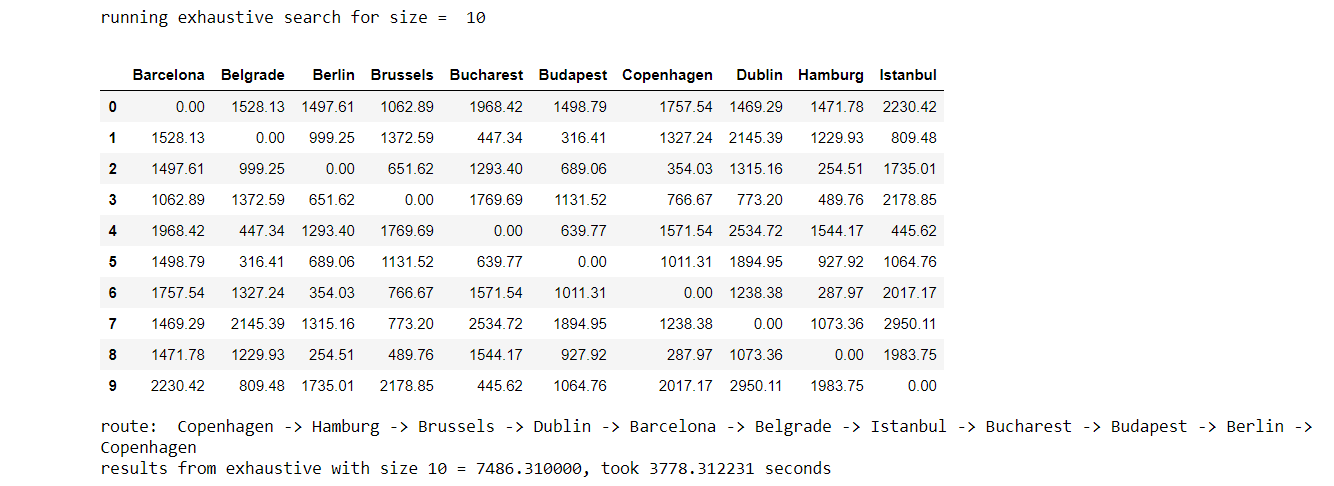

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**.

In [123]:
# Implement the algorithm here
import random
import statistics

"""
This function creates a random route
Input:
    size: the number of cities
Returns:
    the generated route
"""
def get_random_route(size):
    nums = np.arange(0,size,1)
    random.shuffle(nums)
    return nums

"""
This function swaps two random cities in the route.
Input:
    route: The route to be modified
Returns:
    the modified route
"""
def swap_cities(route):
    num1 = 0
    num2 = 0
    while num1==num2:
        num1 = int(random.random()*(len(route)-1)+1)
        num2 = int(random.random()*(len(route)-1)+1)
    
    temp = route[num1]
    route[num1]=route[num2]
    route[num2]=temp
    
    return route



def hill_climb(route,data,size,max_iterations=1000):
    distance = calculate_tour(data,route)
    
    iterations = 0
    while(iterations < max_iterations):
        new_route = swap_cities(route)
        new_dist = calculate_tour(data,route)
        
        if new_dist < distance:
            route = new_route
            distance = new_dist
        else:
            iterations = iterations + 1
    return route,distance
    
"""
This function executes the hillclimbing algorithm.
Input:
    data: Dataframe containing the information about the cities
    size: the amount of cities used in the algorithm
    max_iteration: number of times hillclimbing should be attempted without finding a improvement.
Returns:
    route: best route found in the hillclimbing
    distance: length of the route
"""
def hill_climbing_start(data,size,max_iterations=1000):    
    route = get_random_route(size)
    return hill_climb(route,data,size,max_iterations)
    
    """"distance = calculate_tour(data,route)
    
    iterations = 0
    
    while(iterations < max_iterations):
        new_route = swap_cities(route)
        new_dist = calculate_tour(data,route)
        
        if new_dist < distance:
            route = new_route
            distance = new_dist
        else:
            iterations = iterations + 1
    
    """
    

"""
This function tests the hillclimbing algorithm
Input:
    size: number of cities to be used
    runs: How many times the algorithm should be performed
    max_iterations: the maximum iterations that should be used in the hillclimbing (see hill_climbing)
"""
def test_hillclimbing(size=8, runs=20, max_iterations=1000):
    print("--------\nRunning Hill Climbing algorithm with %d cities for %d runs" % (size,runs))
    data=get_data(size)
    
    results = list()
    times = list()
    
    for i in range(runs):
        print("run: %d/%d" % (i,runs), end="\r")
        start = time.time()
        results.append(hill_climbing_start(data,size,max_iterations))
        end = time.time()
        
        times.append(end-start)
    
    print("Average runtime = %f" % (sum(times)/len(times)))
    
    best = results[0]
    worst = results[0]
    
    distance_sum = 0
    distances = list()
    
    for result in results:
        distance_sum = distance_sum + result[1]
        distances.append(result[1])
        
        if result[1]<best[1]:
            best=result
        elif result[1]>worst[1]:
            worst=result
    
    print("Best run = %s (%f)" % (cityNames(data,best[0]),best[1]))
    print("Worst run = %s (%f)" % (cityNames(data,worst[0]),worst[1]))
    print("Mean distance = %f" % statistics.mean(distances))
    print("Standard deviation = %f" % statistics.stdev(distances))
            
        
    

test_hillclimbing(size=10)
test_hillclimbing(size=24)


--------
Running Hill Climbing algorithm with 10 cities for 20 runs
Average runtime = 1.244923
Best run = Berlin -> Dublin -> Hamburg -> Barcelona -> Copenhagen -> Istanbul -> Brussels -> Belgrade -> Budapest -> Bucharest -> Berlin (7486.310000)
Worst run = Barcelona -> Belgrade -> Copenhagen -> Dublin -> Bucharest -> Budapest -> Brussels -> Berlin -> Hamburg -> Istanbul -> Barcelona (9042.130000)
Mean distance = 8333.917500
Standard deviation = 420.360357
--------
Running Hill Climbing algorithm with 24 cities for 20 runs
Average runtime = 3.271200
Best run = Kiev -> Warsaw -> Belgrade -> Sofia -> Berlin -> Paris -> Hamburg -> Moscow -> Saint Petersburg -> Prague -> Rome -> Munich -> Bucharest -> London -> Stockholm -> Milan -> Copenhagen -> Budapest -> Istanbul -> Dublin -> Brussels -> Barcelona -> Madrid -> Vienna -> Kiev (21208.110000)
Worst run = Barcelona -> Kiev -> Madrid -> Paris -> London -> Sofia -> Stockholm -> Budapest -> Hamburg -> Brussels -> Istanbul -> Munich -> Warsaw 

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

-------
 Running genetic tsp with size 24 for 20 runs. popsize = 100
	Average time per run: 5.817578
	Best result: 15889
	Worst result: 19079
	Mean result: 17885
	Standard deviation: 867
-------
 Running genetic tsp with size 24 for 20 runs. popsize = 200
	Average time per run: 11.245513
	Best result: 16158
	Worst result: 19422
	Mean result: 17557
	Standard deviation: 862
-------
 Running genetic tsp with size 24 for 20 runs. popsize = 400
	Average time per run: 20.455587
	Best result: 15992
	Worst result: 19121
	Mean result: 17904
	Standard deviation: 638


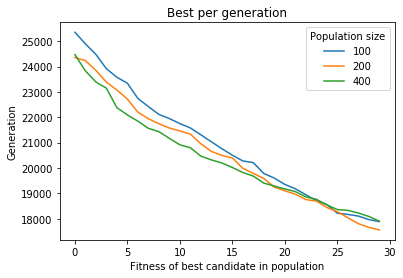

In [120]:
import matplotlib.pyplot as plt
# Implement the algorithm here

"""
This function generates a population of random routes.
Input:
    popsize: Size of population
    cities: How many cities are used in the algorithm
returns:
    routes: list of routes
"""
def populate(popsize,cities):
    routes=list()
    for i in range(popsize):
        route = get_random_route(cities)
        routes.append(route)
    return routes

"""
This function mutates a route by making a small change. Will be used on a offspring after birth.
Currently just using the swap cities algorithm from hill climbing.
Input:
    route: The route which should be mutated.
"""
def mutate(route):
    swap_cities(route)


    
"""
This function recombines two parents into an offspring.
Will use Partially Mapped Crossover as described in "Introduction to Evolutionary Computing" (page 71)

Input:
    parent1: first route to be recombined
    parent2: second route to be recombined
Returns:
    offspring of the two parents

"""
def recombine(parent1, parent2):   
    child = [None]*len(parent1)
    start = int(random.random()*(len(parent1)-1))
    end = int(start+1+random.random()*(len(parent1)-start))
    rand = parent1[start:end]
    
    child[start:end] = rand
    
    for i in range(start,end):
        value = parent2[i]
        if value not in child:
            replaced = child[i]
            #print("looking for ",value,"replaced by ",replaced)
            
            indexfound = False
            newindex = -1
            
            while not indexfound:
                #print("new iteration... looking for ",replaced)
                for idx in range(len(parent2)):
                    if parent2[idx] == replaced:
                        if idx < start or idx >= end:
                            newidx = idx
                            indexfound=True
                            child[idx]=value
                        else:
                            replaced = child[idx]
    
        
    for i in range(len(parent2)):
        if parent2[i] not in child:
            child[i]=parent2[i]
            
    
    return child
    
    
"""
This function selects a set of parents using tournament selection

Input:
    population: The current population of routes and their scores
    n: how many parents should be chosen
    k: The amount of routes in each competition
returns:
    parents: the selected parents
"""
def parent_selection(population,n,k=3):
    participants = population.copy()
    
    parents = list()
    
    for i in range(n):
        competition = list()
        
        #add random routes to the current competition
        for j in range(k):
            index = random.randint(0,len(participants)-1)
            
            competition.append(((index,)+participants[index]))
        
                               
            
        #find the winner
        shortest = competition[0]
        for ent in competition:
            if ent[2] < shortest[2]:
                shortest = ent
        
        #add winner to pool
        parents.append(shortest[1])
        participants.pop(shortest[0])
        
    
    return parents
            
        
    
"""
This function evaluates the new candidates.
Input:
    data: Dataframe containing information about the cities
    candidates: list of candidates to be evaluated
Returns:
    results: List of evaluated candidates. Each entry is a tuple containing the route and the lenght of the route.
"""
def evaluate123(data,candidates):
    
    results = list()
    for candidate in candidates:
        dist = calculate_tour(data,candidate)
        results.append((candidate,dist)) 
    return results
    
"""
This function selects the survivors of a generation. It is based on the fitnes of the route. We replace the least fit
individuals with all the new children. This is a deterministic approach and the least fit individuals will be removed.
The function will also sort the population in descending order.

Input:
    population: the population to chose the survivors and non-survivors from.
    children: the children that is joining the population
"""
def selection(data,population,children):
    
    #population.sort(key= lambda p : calculate_tour(data,p[0]),reverse=True)
    population.sort(key= lambda p : p[1],reverse=True)
    
    for i in range(len(children)):
        population[i]=children[i]
    
    population.sort(key= lambda p : p[1],reverse=True)
        
    
    
    
"""
This function executes the genetic algorithm
Input:
    size: number of cities
    popsize: size of population
    max_generations= number of generations to be used
    nparents: number of parents selected each generation
    chance_for_mutation: Probability for mutation in offspring
    evaluate: function for evaluating the new candidates
"""
def TSPgenetic(size,popsize=100, max_generations=30,nparents=50,chance_for_mutation=0.4,evaluate=evaluate123):
    
    best_per_generation=list()
    
    data = get_data(size)
    
    #Generate initial population and initial evaluation
    population = populate(popsize,size)
    
    population = evaluate(data,population)
    
        
    generation = 1
    while generation <= max_generations:
        #select parents
        parents = parent_selection(population,nparents)
        
        #recombine
        children = list()
        
        it = iter(parents)
        for parent1 in it:
            parent2 = next(it)
            child1=recombine(parent1,parent2)
            child2=recombine(parent2,parent1)
            children.append(child1)
            children.append(child2)
                   
        #mutations
        for child in children:
            probability = random.random()
            if probability < chance_for_mutation:
                mutate(child)
        
        #evaluate
        children = evaluate(data,children)
        
        #select individuals
        selection(data,population,children)
        
        best = population[-1]
        distance = calculate_tour(data,best[0])
        best_per_generation.append(population[-1])
        
        generation+=1
    
    #print(population)
    
    #best is always last
    #best = population[-1]
    
    best = population[0]
    bestdist = calculate_tour(data,best[0])
    for route in population:
        dist = calculate_tour(data,route[0])
        if dist < bestdist:
            best = (route[0],dist)
            bestdist=dist
    
    return (best,best_per_generation)




"""
this function tests the genetic algorithm

Input:
    size: number of cities
    runs: how many runs should be performed for each popsize
    plot: if the averages for each generation should be plotted after execution.
    popsizes: list of population sizes the algorithm should be run with. Will run runs times for each value
    generations: Maximum number of generations to be used in the genetic algorithm
    
"""
def test_geneticTSP(size,runs=20,plot=True,popsizes=[100,200,400],generations=30,evaluate=evaluate123):
    averages = list()
    
    for popsize in popsizes:
        print("-------\n Running genetic tsp with size %d for %d runs. popsize = %d" % (size,runs,popsize))
        
        popsizeresults = list() #averages for given popsize
        times = list()
        
        for i in range(runs):
            print("run: %d/%d" % (i,runs), end="\r")
            start = time.time()
            result = TSPgenetic(size=size,popsize=popsize, nparents=int(popsize/2),max_generations=generations,evaluate=evaluate123)
            end=time.time()
            times.append(end-start)
            popsizeresults.append(result)
        
        
        best = popsizeresults[0][0]
        worst = popsizeresults[0][0]
        distances = list()
        
        for result,pergen in popsizeresults:
            distances.append(result[1])
            if result[1] < best[1]:
                best = result
            elif result[1] > worst[1]:
                worst = result
        
        print("\tAverage time per run: %f" % statistics.mean(times))
        print("\tBest result: %d" % best[1])
        print("\tWorst result: %d" % worst[1])
        print("\tMean result: %d" % statistics.mean(distances))
        print("\tStandard deviation: %d" % statistics.stdev(distances))
        
        sumbestpergens = [0]*generations
        
        for i in range(runs):
            best_per_gen = popsizeresults[i][1]
            for j in range(len(best_per_gen)):
                sumbestpergens[j] += best_per_gen[j][1]
        for i in range(generations):
            sumbestpergens[i] = sumbestpergens[i]/runs
            
            
        averages.append(sumbestpergens)
    
    if plot:
        plt.figure()
        i = 0
        for graph in averages:
            #plt.subplot(111)
            plt.plot(graph, label=popsizes[i])
            i+=1
            
        plt.legend(title="Population size")
        plt.xlabel("Fitness of best candidate in population")
        plt.ylabel("Generation")
        plt.title("Best per generation")
        plt.show()


test_geneticTSP(24,runs=20,plot=True,generations=15)

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

# Answer

## 10 Cities

The running time improved drastically. The Exhaustive search used over 50 minutes, while the genetic algorithm only used a few seconds per run.

The genetic algorithm often found the best route, but not always. With larger population size the algorithm found the best route more often, but also used more time.

## 24 Cities


## Tours inspected

The exhaustive search inspected N! routes.

The genetic algorithm searches P routes initially, then C routes every generation.



## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

-----
Lamarckian selection: 2 runs with 10 cities
	Average time per run: 25.817103
	Best result: 8611
	Worst result: 8737
	Mean result: 8674
	Standard deviation: 89
-----
Baldwinian selection: 2 runs with 10 cities
	Average time per run: 24.972373
	Best result: 8124
	Worst result: 8691
	Mean result: 8407
	Standard deviation: 400


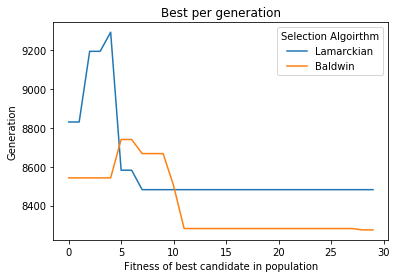

In [118]:
# Implement algorithm here

"""
This function evaluates the new candidates. It is based on the lamarckian theory about the ability for offspring 
to inherit traits. This means that we will use hillclimbing for a few iterations. If an improved route is found, the original
route will be replaced by the improved route.

Input:
    data: Dataframe containing information about the cities
    candidates: list of candidates to be evaluated
Returns:
    results: List of evaluated candidates. Each entry is a tuple containing the route and the lenght of the route.
"""
def lamarckian_evaluation(data,candidates,size,iterations=5):
    results = list()
    for candidate in candidates:
        route= candidate
        dist = calculate_tour(data,route)
        
        #perform some hillclimbing
        newroute,newdist = hill_climb(candidate,data,size,max_iterations=iterations)
        if newdist < dist:
            route=newroute
            dist=newdist
        
        results.append((candidate,dist))
        
    return results

"""
This function evaluates the new candidates. It is based on the baldwinian theory. We will use hillclimbing for a few
iterations. If an improved route is found, we will set the fitness of the original route to the distance of the
improved route.

Input:
    data: Dataframe containing information about the cities
    candidates: list of candidates to be evaluated
Returns:
    results: List of evaluated candidates. Each entry is a tuple containing the route and the lenght of the route.
"""
def baldwinian_evaluation(data,candidates,size,iterations=5):
    results = list()
    for candidate in candidates:
        route=candidate
        dist = calculate_tour(data,route)
        
        #perform some hillclimbing
        newroute,newdist = hill_climb(candidate,data,size,max_iterations=iterations)
        if newdist < dist:
            dist=newdist #set distance of old route to new distance
        
        results.append((candidate,dist))
    return results

def hybrid_algorithm(runs = 2,size = 10,plot=True,generations=30):
    #run with lamarckian
    size = 10
    
     #lamarckian evaluation
    lamarckian_res = list()
    times = list()
    print("-----\nLamarckian selection: %d runs with %d cities" % (runs,size))
    for i in range(runs):
        start = time.time()
        lamarck = TSPgenetic(size=size,max_generations=generations,evaluate= lambda data, pop: lamarckian_evaluation(data,pop,size))
        end = time.time()
        times.append(end-start)
        lamarckian_res.append(lamarck) 
    best = lamarckian_res[0][0]
    worst = lamarckian_res[0][0]
    distances = list()
    for result,pergen in lamarckian_res:
        distances.append(result[1])
        if result[1] < best[1]:
            best = result
        elif result[1] > worst[1]:
            worst = result
    print("\tAverage time per run: %f" % statistics.mean(times))
    print("\tBest result: %d" % best[1])
    print("\tWorst result: %d" % worst[1])
    print("\tMean result: %d" % statistics.mean(distances))
    print("\tStandard deviation: %d" % statistics.stdev(distances))   
    
    sumbestpergens_lamarck = [0]*30
    for i in range(runs):
            best_per_gen = lamarckian_res[i][1]
            for j in range(len(best_per_gen)):
                sumbestpergens_lamarck[j] += best_per_gen[j][1]
    for i in range(30):
        sumbestpergens_lamarck[i] = sumbestpergens_lamarck[i]/runs
    
    
    
    #baldwinian evaluation
    baldwinian_res = list()
    times = list()
    print("-----\nBaldwinian selection: %d runs with %d cities" % (runs,size))

    for i in range(runs):
        start = time.time()
        bald = TSPgenetic(size=size,evaluate= lambda data, pop: baldwinian_evaluation(data,pop,size))
        end=time.time()
        baldwinian_res.append(bald)
        times.append(end-start)
    
    best = baldwinian_res[0][0]
    worst = baldwinian_res[0][0]
    distances = list()
    for result,pergen in baldwinian_res:
        distances.append(result[1])
        if result[1] < best[1]:
            best = result
        elif result[1] > worst[1]:
            worst = result
    print("\tAverage time per run: %f" % statistics.mean(times))
    print("\tBest result: %d" % best[1])
    print("\tWorst result: %d" % worst[1])
    print("\tMean result: %d" % statistics.mean(distances))
    print("\tStandard deviation: %d" % statistics.stdev(distances))   
        
        
    sumbestpergens_baldwin = [0]*30
    for i in range(runs):
            best_per_gen = baldwinian_res[i][1]
            for j in range(len(best_per_gen)):
                sumbestpergens_baldwin[j] += best_per_gen[j][1]
    for i in range(30):
        sumbestpergens_baldwin[i] = sumbestpergens_baldwin[i]/runs
    
        
    if plot:
        plt.figure()
        plt.plot(sumbestpergens_lamarck, label="Lamarckian")
        plt.plot(sumbestpergens_baldwin, label="Baldwin")
            
        plt.legend(title="Selection Algoirthm")
        plt.xlabel("Fitness of best candidate in population")
        plt.ylabel("Generation")
        plt.title("Best per generation")
        plt.show()
    

hybrid_algorithm()
    

# Notes
I'm not sure if I did this correctly. Found it quite hard to keep track of the new fittingscores and make them compatible with the old program. The algorithm works somewhat, but it is not as good as the normal genetic algorithm as it seems to struggle with being stuck in a local optimum.

If i am required to deliver a second attempt, I would appreciate some pointer on how to make this algorithm more optimal